In [5]:
from datetime import timedelta
import cv2
import numpy as np
import os

In [42]:
import numpy as np # linear algebra
import pandas as pd
import zipfile
import time
import torch
import torchvision as tv
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torchvision.datasets.vision import StandardTransform
from torchvision.utils import make_grid
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as TF
from torch.utils.data import DataLoader, random_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import sys
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

%matplotlib inline

DATA_DIR = "./data"

In [33]:
SAVING_FRAMES_PER_SECOND = 10

def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05) 
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return result + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")


def get_saving_frames_durations(cap, saving_fps):
    """A function that returns the list of durations where to save the frames"""
    s = []
    # get the clip duration by dividing number of frames by the number of frames per second
    clip_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    # use np.arange() to make floating-point steps
    for i in np.arange(0, clip_duration, 1 / saving_fps):
        s.append(i)
    return s

def extract_frames_from(video_file):
  # read the video file    
  cap = cv2.VideoCapture(video_file)

  # Check if camera opened successfully
  if(cap.isOpened()== False):
	  print("Error opening video stream or file")
  # get the FPS of the video
  fps = cap.get(cv2.CAP_PROP_FPS)
  # if the SAVING_FRAMES_PER_SECOND is above video FPS, then set it to FPS (as maximum)
  saving_frames_per_second = min(fps, SAVING_FRAMES_PER_SECOND)
  # get the list of duration spots to save
  saving_frames_durations = get_saving_frames_durations(cap, saving_frames_per_second)
  # start the loop
  count = 0
  frames = []
  while True:
      is_read, frame = cap.read()
      if not is_read:
          # break out of the loop if there are no frames to read
          break
      # get the duration by dividing the frame count by the FPS
      frame_duration = count / fps
      try:
          # get the earliest duration to save
          closest_duration = saving_frames_durations[0]
      except IndexError:
          # the list is empty, all duration frames were saved
          break
      if frame_duration >= closest_duration:
          # if closest duration is less than or equals the frame duration, 
          # then save the frame
          frame_duration_formatted = format_timedelta(timedelta(seconds=frame_duration))
          #cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
          ## drop the duration spot from the list, since this duration spot is already saved
          frames.append(frame)
          try:
              saving_frames_durations.pop(0)
          except IndexError:
              pass
      # increment the frame count
      count += 1
  return frames

In [39]:
def plot_faces(images, coordinates=None, num=5):
  for i in range(num):
    if coordinates == None or coordinates[i] == None:
      plot_face(images[i])
    else:
      plot_face(images[i],coordinates[i])


def plot_face(image, coordinates=None, num=5):
    plt.imshow(image, interpolation='nearest',cmap="gray")
    if coordinates is not None:
      for i in range(0,len(coordinates)-1,2):
        plt.plot(coordinates[i + 0],coordinates[i + 1],marker=".",color="red")
    plt.show()

In [47]:
from PIL import Image

def opencv_to_pil_image(opencv_image):
  color_coverted = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
  pil_image=Image.fromarray(color_coverted)
  return pil_image

def pil_to_opencv_image(pil_image):
  np_image=np.array(pil_image)  

  # convert to a openCV2 image, notice the COLOR_RGB2BGR which means that 
  # the color is converted from RGB to BGR format
  opencv_image=cv2.cvtColor(np_image, cv2.COLOR_RGB2BGR)
  return opencv_image


In [16]:
!ls

sample_data  test-leo-webcam.jpg  test-leo-webcam.mp4


In [25]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=1b04ce82c006199d5a0b7676958dd2d6e61f1384901b183c7934d3daa91143bc
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [30]:
from google.colab import drive
import os
import os.path
import wget

os.chdir("/content")
TEST_VIDEO_FILE = 'test-leo-webcam2.mp4'

if not os.path.isfile(f"./{TEST_VIDEO_FILE}"):
  url = f"https://github.com/ko-redtruck/facial-landmark-detection/raw/main/{TEST_VIDEO_FILE}"
  wget.download(url, ".")

In [31]:
!ls

sample_data  test-leo-webcam2.mp4  test-leo-webcam.jpg	test-leo-webcam.mp4


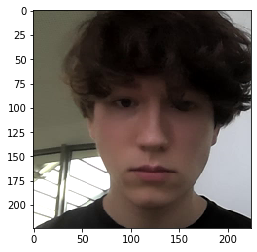

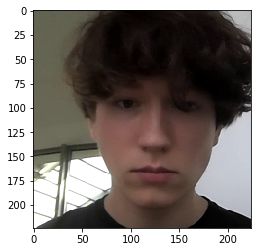

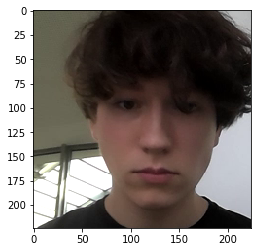

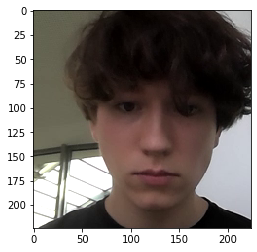

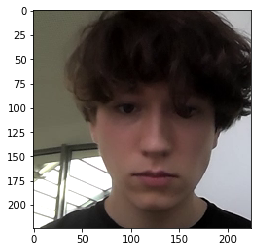

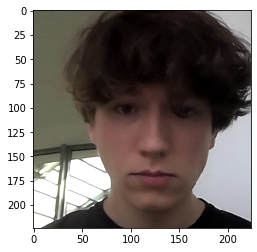

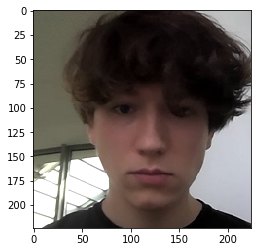

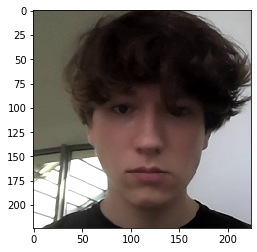

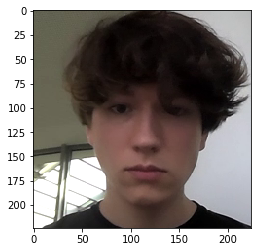

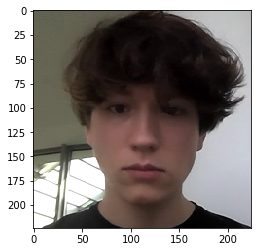

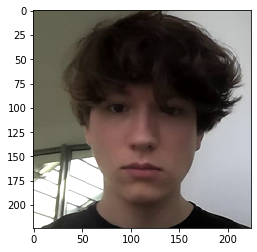

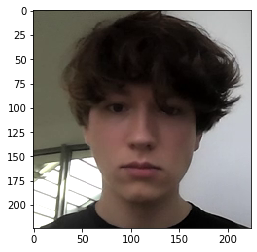

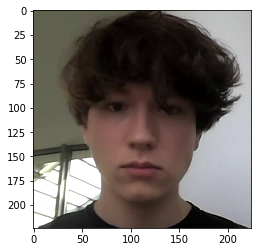

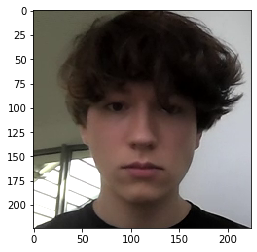

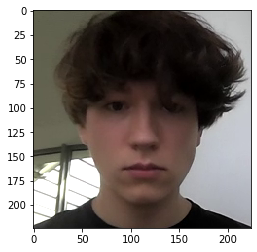

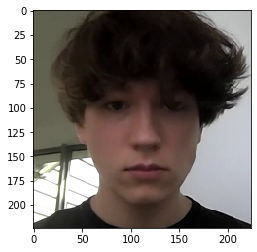

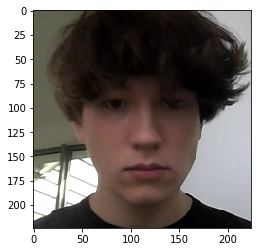

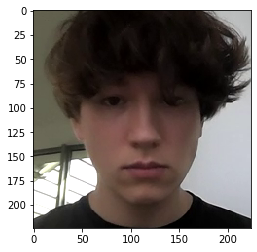

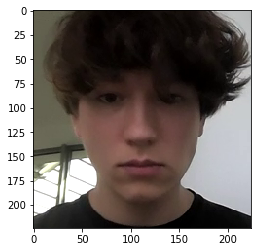

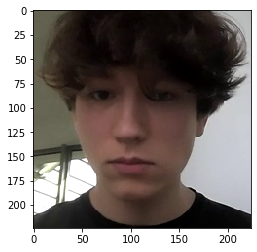

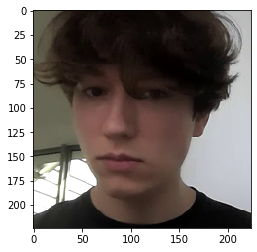

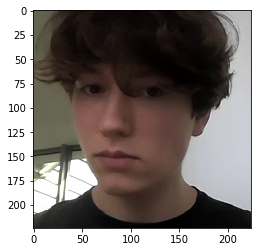

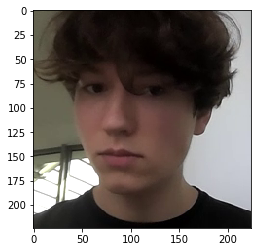

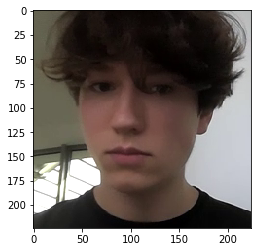

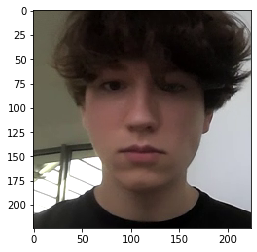

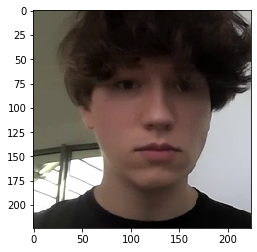

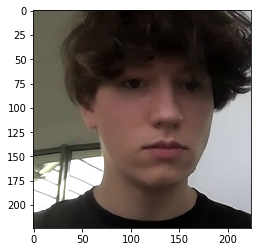

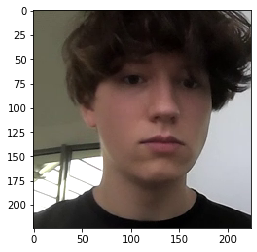

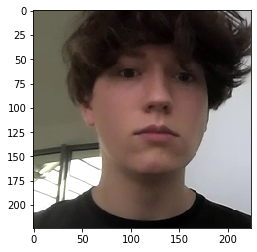

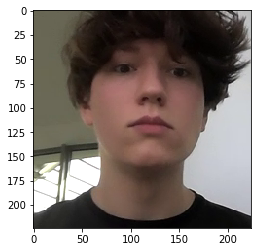

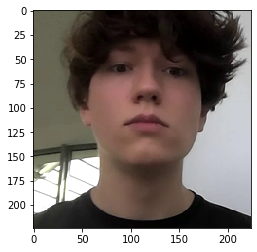

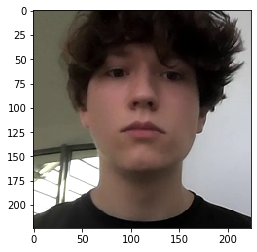

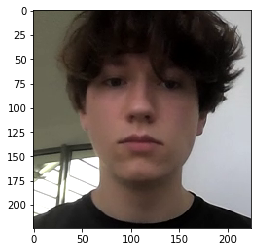

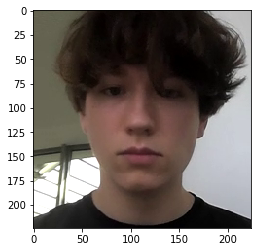

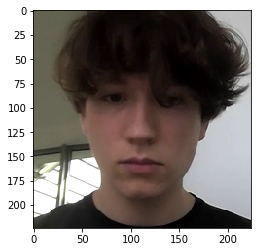

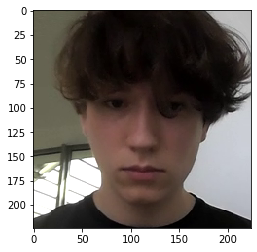

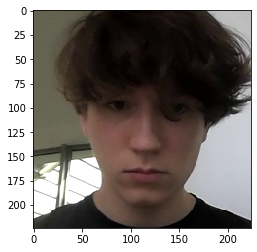

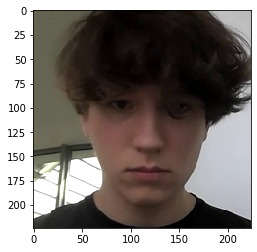

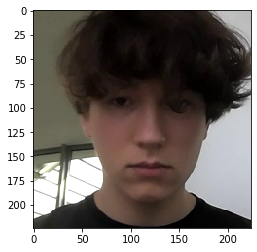

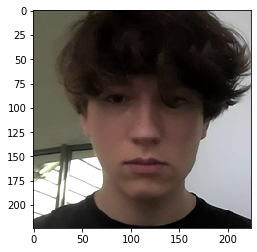

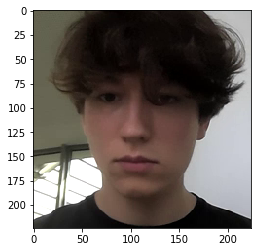

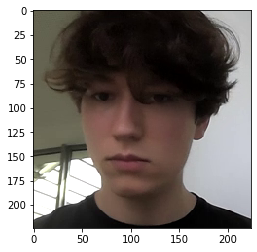

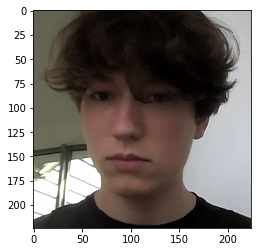

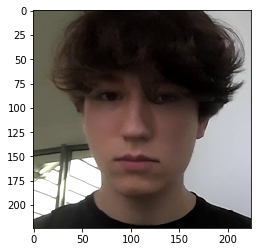

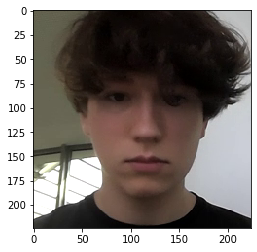

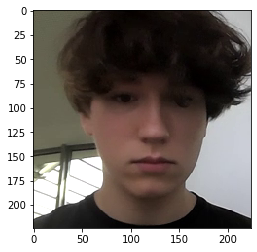

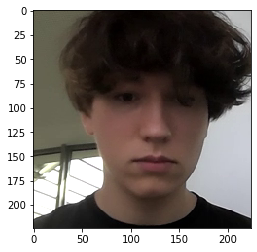

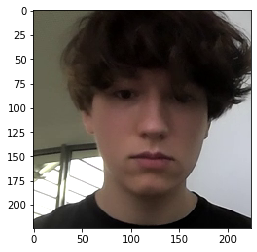

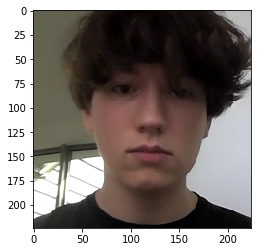

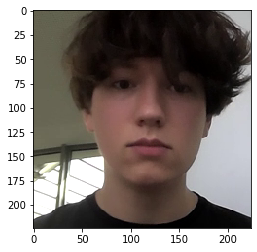

In [45]:
frames = [opencv_to_pil_image(opencv_image) for opencv_image in extract_frames_from(TEST_VIDEO_FILE)]

transform_image = TF.CenterCrop(224)
frames = [transform_image(pil_image) for pil_image in frames]
plot_faces(frames,None,50)  

In [46]:
def opencv_images_to_video(opencv_images,video_filename):
  height, width, layers = opencv_images[0].shape
  image_size = (width, height)

  out = cv2.VideoWriter(video_filename, cv2.VideoWriter_fourcc(*'MP4V'), SAVING_FRAMES_PER_SECOND, image_size)
  for frame in opencv_images:
    out.write(frame)
  out.release()


In [49]:
opencv_images_to_video([pil_to_opencv_image(pil_image) for pil_image in frames],'leo-cropped.mp4')

In [53]:
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display


In [60]:
import IPython.display

#IPython.display.Video("leo-cropped.mp4")
dir(IPython.display)

['Audio',
 'DisplayHandle',
 'DisplayObject',
 'FileLink',
 'FileLinks',
 'HTML',
 'IFrame',
 'Image',
 'JSON',
 'Javascript',
 'Latex',
 'Markdown',
 'Math',
 'Pretty',
 'ProgressBar',
 'SVG',
 'ScribdDocument',
 'TextDisplayObject',
 'VimeoVideo',
 'YouTubeVideo',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clear_output',
 'display',
 'display_html',
 'display_javascript',
 'display_jpeg',
 'display_json',
 'display_latex',
 'display_markdown',
 'display_pdf',
 'display_png',
 'display_pretty',
 'display_svg',
 'publish_display_data',
 'set_matplotlib_close',
 'set_matplotlib_formats',
 'update_display']

In [61]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('leo-cropped.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)